### R Anjana, 21110251, Reinforcement Learning Assignment

In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [23]:
class ArticleBandit:
    def __init__(self, p, name, verbose=True):
        self.p = p  
        self.name = name  
        self.views = 0  
        self.times_pulled = 0  
        if verbose:
            print(f"Creating ArticleBandit '{name}' with p = {p:.2f}")
    
    def pull(self):
        result = np.random.binomial(1, self.p)
        self.views += result
        self.times_pulled += 1
        return result

In [24]:
class MediaCompany:
    def __init__(self, K, T, article_names, verbose=True):
        self.T = T  
        self.K = K  
        self.articles = [ArticleBandit(np.random.uniform(), name, verbose) for name in article_names]
        self.verbose = verbose

    def run_stochastic(self):
        results = np.zeros((self.T, self.K))
        article_choice_log = [] 
        
        for t in range(self.T):
            k = random.randrange(self.K)  
            reward = self.articles[k].pull()  
            results[t, k] = reward
            article_choice_log.append((t, self.articles[k].name, reward))
            if self.verbose:
                print(f"T={t} \t Article: '{self.articles[k].name}' \t Views: {reward}")
        
        return results, article_choice_log


In [25]:
# Simulation setup
K = 3  
T = 20  
article_names = ["Article A", "Article B", "Article C"]


In [26]:
company = MediaCompany(K=K, T=T, article_names=article_names)
results, article_choice_log = company.run_stochastic()

Creating ArticleBandit 'Article A' with p = 0.36
Creating ArticleBandit 'Article B' with p = 0.90
Creating ArticleBandit 'Article C' with p = 0.74
T=0 	 Article: 'Article C' 	 Views: 1
T=1 	 Article: 'Article C' 	 Views: 0
T=2 	 Article: 'Article B' 	 Views: 1
T=3 	 Article: 'Article C' 	 Views: 1
T=4 	 Article: 'Article B' 	 Views: 1
T=5 	 Article: 'Article A' 	 Views: 0
T=6 	 Article: 'Article B' 	 Views: 1
T=7 	 Article: 'Article B' 	 Views: 1
T=8 	 Article: 'Article B' 	 Views: 0
T=9 	 Article: 'Article A' 	 Views: 0
T=10 	 Article: 'Article C' 	 Views: 1
T=11 	 Article: 'Article C' 	 Views: 1
T=12 	 Article: 'Article C' 	 Views: 1
T=13 	 Article: 'Article C' 	 Views: 1
T=14 	 Article: 'Article A' 	 Views: 0
T=15 	 Article: 'Article A' 	 Views: 1
T=16 	 Article: 'Article C' 	 Views: 1
T=17 	 Article: 'Article A' 	 Views: 0
T=18 	 Article: 'Article A' 	 Views: 0
T=19 	 Article: 'Article A' 	 Views: 1


In [27]:
print("\nSummary of Article Performances:")
for article in company.articles:
    print(f"'{article.name}' was published {article.times_pulled} times and got {article.views} views.")

print("\nDetailed Log of Article Choices:")
for log_entry in article_choice_log:
    print(f"Time {log_entry[0]}: Published '{log_entry[1]}', Views: {log_entry[2]}")


Summary of Article Performances:
'Article A' was published 7 times and got 2 views.
'Article B' was published 5 times and got 4 views.
'Article C' was published 8 times and got 7 views.

Detailed Log of Article Choices:
Time 0: Published 'Article C', Views: 1
Time 1: Published 'Article C', Views: 0
Time 2: Published 'Article B', Views: 1
Time 3: Published 'Article C', Views: 1
Time 4: Published 'Article B', Views: 1
Time 5: Published 'Article A', Views: 0
Time 6: Published 'Article B', Views: 1
Time 7: Published 'Article B', Views: 1
Time 8: Published 'Article B', Views: 0
Time 9: Published 'Article A', Views: 0
Time 10: Published 'Article C', Views: 1
Time 11: Published 'Article C', Views: 1
Time 12: Published 'Article C', Views: 1
Time 13: Published 'Article C', Views: 1
Time 14: Published 'Article A', Views: 0
Time 15: Published 'Article A', Views: 1
Time 16: Published 'Article C', Views: 1
Time 17: Published 'Article A', Views: 0
Time 18: Published 'Article A', Views: 0
Time 19: P

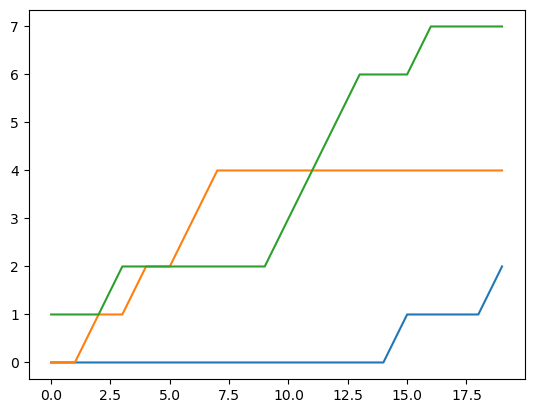

In [28]:
cumulative_views = np.cumsum(results, axis=0)
for i, article in enumerate(company.articles):
    plt.plot(cumulative_views[:, i], label=article.name)
